In [1]:
#!pip install pandas openpyxl
import os
import re
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from numpy import stack
import seaborn as sns
from sympy import li

In [2]:
from matplotlib import colormaps
import matplotlib as mpl


COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['grid.color'] = 'grey'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['figure.facecolor'] = 'white'


#print(list(colormaps))
# Color palettes
# ['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 
# 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r','Accent_r', 'Dark2_r', 'Paired_r', 'Pastel1_r', 'Pastel2_r', 'Set1_r', 'Set2_r', 
# 'Set3_r', 'tab10_r', 'tab20_r', 'tab20b_r', 'tab20c_r']

#print(plt.style.available)
#plt.style.use('tableau-colorblind10')
#plt.style.use(['dark_background'])

### Load and Read file with Annotations
***

In [3]:
# Load the Excel file
file_path = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/annotation_data/new_annotations_final.xlsx'

# Read the sheets into separate DataFrames
df1 = pd.read_excel(file_path, sheet_name='refined_all_annotations (new)').drop(columns=['notes','links/sup material '])
print('The  Number of Unique Titles:', len(df1['title'].unique()))
df1.head()

The  Number of Unique Titles: 62


,title,paper name,vol,Does the article contain any of these keywords: cancer/tumor/tumour?,Study subject labelled as ‘patient/patients’ in dataset(s),age,sex/gender,ethnicity,geographical location,dataset quantity,...,location,location as a healthcare facility,name of healthcare facility,location as other (center/department/laboratory/university/institution/online),name of location as other (center/department/laboratory/university/institution/online),location as large-scale geographical entity,name of location as large-scale geographical entity,location as subnational geographical entity,name of location as subnational geographical entity,Information found outside article (such as sup material and/or by references
0,3D Arterial Segmentation via Single 2D Project...,14,1,1,1,0,1,0,1,1,...,1,1,No Name,0,No Name,0,No Name,0,No Name,1
1,A Multi-task Network for Anatomy Identificatio...,45,9,1,1,0,0,0,1,1,...,1,1,national hospital of neurology and neurosurgery,0,No Name,1,united kingdom,1,london,1
2,A Texture Neural Network to Predict the Abnorm...,46,8,1,1,1,1,0,1,1,...,1,1,anonymous,0,No Name,0,No Name,0,No Name,0
3,ALL-IN: A Local GLobal Graph-Based DIstillatio...,74,3,1,1,0,0,0,0,3,...,0,0,No Name,0,No Name,0,No Name,0,No Name,1
4,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,17,1,1,1,0,0,0,0,1,...,0,0,No Name,0,No Name,0,No Name,0,No Name,1


In [4]:
# Extract unique organs and image types
organs = (df1['organ/body part in datasets'].unique()).tolist()

final = []
for value in organs:
    organ = value.split(",")
    organ = value.split(",")
    organ = [x.strip() for x in organ]
    final.append(tuple(organ))

# list of unique organs
unique_organs = [y for x in final for y in x]
print(unique_organs)

# Extract unique image types
image_types = (df1['image type in datasets'].unique()).tolist()

final = []
for value in image_types:
    image_type = value.split(",")
    image_type = [x.strip() for x in image_type]
    final.append(tuple(image_type))

# list of unique image types
unique_image_types = [y for x in final for y in x]
print(unique_image_types)

# Count the number of occurrences of each organ and image type
organ_counts = df1['organ/body part in datasets'].str.split(',').explode().str.strip().value_counts()
image_type_counts = df1['image type in datasets'].str.split(',').explode().str.strip().value_counts()

['abdomen', 'pituitary gland', 'breast', 'prostate', 'brain', 'head and neck', 'h&n', 'thyroid', 'chest', 'heart', 'chest', 'lung', 'lung', 'stomach', 'abdomen', 'colorectal', 'chest', 'lung', 'heart', 'skin', 'colon', 'lymp nodes', 'no organ mentioned', 'skin', 'prostate', 'brain', 'abdomen', 'kidney', 'liver', 'brain', 'abdomen', 'pelvic region', 'prostate', 'liver', 'brain', 'cerebral', 'whole body', 'lung', 'liver', 'spleen', 'lung', 'liver', 'liver', 'gallbladder', 'hepatic vein', 'spleen', 'stomach', 'pancreas', 'abdomen', 'thorax', 'head and neck', 'brain', 'chest', 'pancreas', 'lymp nodes', 'lung', 'liver', 'lung', 'lymp nodes', 'renal', 'abdomen', 'heart', 'colorectal', 'breast', 'colon', 'human brain', 'monkey brain', 'lung', 'breast', 'tissue', 'cerebral', 'brain', 'swine liver', 'breast', 'eye', 'head', 'neck', 'brain']
['contrast-enhanced abdominal computed tomography images', 'cts', 'endoscope', 'mri', 'magnetic resonance', 'biopsy slides', 'ihc', 'if', 'multiplex stainin

### Organ types
***

1) Original Category: The list of organs from the annotations are divided into main categories of the body, based on anatomical regions and organ systems.
***

| Category                     | Organ Types                                                                                                      |
|------------------------------|------------------------------------------------------------------------------------------------------------------|
| **Central Nervous System**   | brain, human brain, cerebral, brainstem, spinal cord, cells, optical chiasm, left optical nerve, right optical nerve, eye, brainstem |
| **Head and Neck**            | head, neck, head and neck, h&n, mandible, left parotid, right parotid, left submandibular gland, right submandibular gland                |
| **Cardiovascular System**    | heart, vein                                                                                                      |
| **Respiratory System**       | chest, lung, left lung, right lung, heart, thorax, esophagus, trachea                                            |
| **Digestive System**         | liver, stomach, gallbladder, hepatic, large bowel, duodenum, small bowel, abdomen, colon, colon tissue, gastro, hepatic, colorectal         |
| **Lymphatic System**         | lymph nodes, spleen                                                                                              |
| **Musculoskeletal System**   | musculoskeletal system                                                                                           |
| **Integumentary System**     | skin, hair, nails                                                                                                |
| **Endocrine System**         | thyroid, pituitary gland, pancreas                                                                               |
| **Whole Body**               | whole body                                                                                                       |
| **Genitourinary System**     | genitourinary system, pelvic region, pelvis, kidney, left kidney, right kidney, bladder                           |
| **Male Reproductive System** | penis, prostate, testes                                                                                           |
| **Female Reproductive System** | cervix, uterus, mammary glands, ovaries, breast                                                                 |
| **No Organ Mentioned**       | no organ mentioned, 0                                                                                            |
| **Zoology**                   | swine liver, monkey brain                                                                                        |


In [5]:
organ_types_by_category = {
    "Central Nervous System"    : ['brain', 'human brain', 'cerebral', 'brainstem', 'spinal cord', 'cells', 'optical chiasm', 'left optical nerve', 
                                   'right optical nerve', 'eye', 'brainstem'],
    "Head and Neck"             : ['head', 'neck', 'head and neck', 'h&n','mandible',  'left parotid', 'right parotid', 'left submandibular gland', 'right submandibular gland'],
    "Cardiovascular System"     : ['heart', 'vein'],
    "Respiratory System"        : ['chest', 'lung', 'left lung', 'right lung', 'heart', 'thorax', 'esophagus', 'trachea'],
    "Digestive System"          : ['liver', 'stomach', 'gallbladder', 'hepatic', 'large bowel', 'duodenum', 'small bowel', 
                                   'abdomen', 'colon', 'colon tissue', 'gastro', 'hepatic vein', 'colorectal'],
    "Lymphatic System"          : ['lymph nodes', 'lymp nodes', 'spleen'],
    "Musculoskeletal System"    : ['musculoskeletal system'],
    "Integumentary System"      : ['skin', 'hair', 'nails'],
    "Endocrine System"          : ['thyroid', 'pituitary gland', 'pancreas'],
    "Whole Body"                : ['whole body', 'tissue'],
    "Genitourinary System"      : ['genitourinary system', 'pelvic region', 'pelvis', 'kidney', 'left kidney', 'right kidney', 'bladder', 'renal'],
    "Male Reproductive System"  : ['penis', 'prostate', 'testes'],
    "Female Reproductive System": ['cervix', 'uterus', 'mammary glands', 'ovaries', 'breast'],
    'No Organ Mentioned'        : ['no organ mentioned', '0'],
    "Zoology"                   : ['swine liver', 'monkey brain']
}

# Function to categorize each value and return the set of categories
def categorize_row(row):
    # Split the row by comma and strip spaces
    organ_types = [x.strip() for x in row.split(',')]
    # Initialize a set to hold unique categories for this row
    row_categories = set()
    for organ_type in organ_types:
        # Check each category for a match and add to the set
        for category, types in organ_types_by_category.items():
            if organ_type in types:
                row_categories.add(category)
                break
    # Return a comma-separated string of unique categories or a single category
    return ', '.join(row_categories) if row_categories else 'Uncategorized'

# Apply the categorization function to each row in the DataFrame
df1['organ_category'] = df1['organ/body part in datasets'].apply(categorize_row)

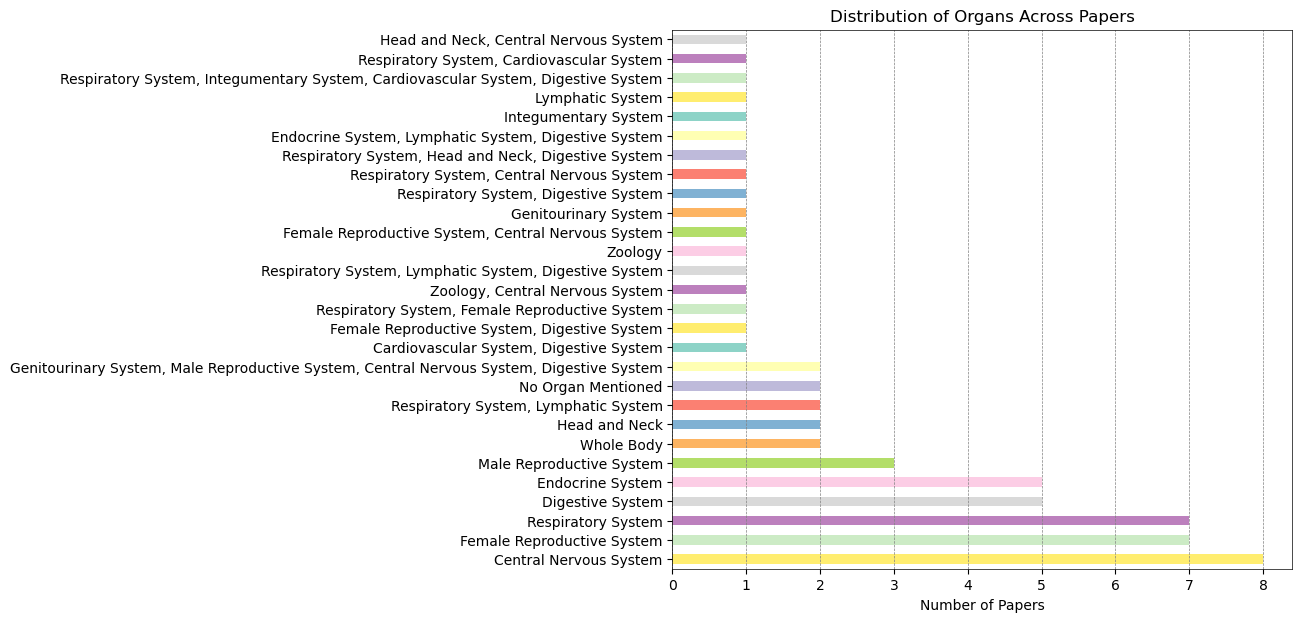

In [6]:
colors = plt.cm.Set3_r.colors


# Count the number of papers in each category
organ_counts = df1['organ_category'].value_counts()
# Horizontal bar chart
plt.figure(figsize=(8, 7))
organ_counts.plot(kind='barh', color=colors)
plt.title('Distribution of Organs Across Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Organ Category').set_visible(False)
plt.grid(axis='x', linestyle='--')
plt.show()

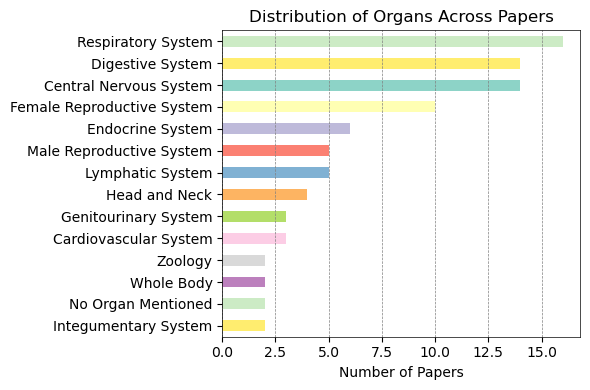

In [7]:
colors = plt.cm.Set3_r.colors  # Or any other colormap that you like


# Create a new dataframe where each row has only one category
# by splitting the 'organ_category' column and then using explode()
df_expanded = df1['organ_category'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
organ_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Horizontal bar chart
plt.figure(figsize=(6, 4))
organ_counts.plot(kind='barh', color=colors)
plt.title('Distribution of Organs Across Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Organ Category').set_visible(False)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()  
plt.show()

***
Option 2) Refining the dataframe: the categorize_row function returns a list of categories instead of a comma-separated string. After applying this function, the DataFrame will have a column where each row is a list of categories. Next, using explode on that column which will create a new row in the DataFrame for each element in the list, duplicating the other row information.

In [8]:
organ_types_by_category = {
    "Central Nervous System"    : ['brain', 'human brain', 'cerebral', 'brainstem', 'spinal cord', 'cells', 'optical chiasm', 'left optical nerve', 
                                   'right optical nerve', 'eye', 'brainstem'],
    "Head and Neck"             : ['head', 'neck', 'head and neck', 'h&n','mandible',  'left parotid', 'right parotid', 'left submandibular gland', 'right submandibular gland'],
    "Cardiovascular System"     : ['heart', 'vein'],
    "Respiratory System"        : ['chest', 'lung', 'left lung', 'right lung', 'heart', 'thorax', 'esophagus', 'trachea'],
    "Digestive System"          : ['liver', 'stomach', 'gallbladder', 'hepatic', 'large bowel', 'duodenum', 'small bowel', 
                                   'abdomen', 'colon', 'colon tissue', 'gastro', 'hepatic vein', 'colorectal'],
    "Lymphatic System"          : ['lymph nodes', 'lymp nodes', 'spleen'],
    "Musculoskeletal System"    : ['musculoskeletal system'],
    "Integumentary System"      : ['skin', 'hair', 'nails'],
    "Endocrine System"          : ['thyroid', 'pituitary gland', 'pancreas'],
    "Whole Body"                : ['whole body', 'tissue'],
    "Genitourinary System"      : ['genitourinary system', 'pelvic region', 'pelvis', 'kidney', 'left kidney', 'right kidney', 'bladder', 'renal'],
    "Male Reproductive System"  : ['penis', 'prostate', 'testes'],
    "Female Reproductive System": ['cervix', 'uterus', 'mammary glands', 'ovaries', 'breast'],
    'No Organ Mentioned'        : ['no organ mentioned', '0'],
    "Zoology"                    : ['swine liver', 'monkey brain']
}

# Function to categorize each value and return a list of categories
def categorize_row(row):
    # Split the row by comma and strip spaces
    organ_types = [x.strip() for x in row.split(',')]
    # Initialize a list to hold unique categories for this row
    row_categories = []
    for organ_type in organ_types:
        # Check each category for a match and append to the list
        for category, types in organ_types_by_category.items():
            if organ_type in types and category not in row_categories:
                row_categories.append(category)
    # Return the list of categories or ['Uncategorized'] if none are found
    return row_categories if row_categories else ['Uncategorized']

# Apply the categorization function to each row in the DataFrame
df1['organ_category'] = df1['organ/body part in datasets'].apply(categorize_row)

# Now explode the DataFrame to have a separate row for each category
df1_exploded = df1.explode('organ_category').reset_index(drop=True)

However, previous code made duplicate rows for papers with more than one organ category. To solve this issue, we have defined a function check_category_presence that checks if any organ from the row's organ list is present in each category.

It then applies this function to the DataFrame, creating a dictionary for each row with True/False values indicating the presence of each category.
It iterates over each category and creates a new column in df1 for that category, setting the value based on the presence of the category.
Optionally, it converts boolean values to binary (1/0) for a more typical binary indicator format.

In [9]:
# Function to check presence of each category in the row
def check_category_presence(organ_types, category_list):
    presence_dict = {}
    for category in category_list:
        presence_dict[category] = any(organ in organ_types_by_category[category] for organ in organ_types)
    return presence_dict

# List of all categories
all_categories = list(organ_types_by_category.keys())

# Split the 'organ/body part in datasets' column and apply the function
df1['organ_types'] = df1['organ/body part in datasets'].str.split(', ')
category_presence = df1['organ_types'].apply(lambda organs: check_category_presence(organs, all_categories))

# Now create a column for each category based on presence
for category in all_categories:
    df1[category] = category_presence.apply(lambda x: x[category])

# Bbinary indicators, convert the True/False to 1/0
df1[all_categories] = df1[all_categories].astype(int)

# df1 now has an extra column for each category without duplicating rows
df1.head()

,title,paper name,vol,Does the article contain any of these keywords: cancer/tumor/tumour?,Study subject labelled as ‘patient/patients’ in dataset(s),age,sex/gender,ethnicity,geographical location,dataset quantity,...,Lymphatic System,Musculoskeletal System,Integumentary System,Endocrine System,Whole Body,Genitourinary System,Male Reproductive System,Female Reproductive System,No Organ Mentioned,Zoology
0,3D Arterial Segmentation via Single 2D Project...,14,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,A Multi-task Network for Anatomy Identificatio...,45,9,1,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,A Texture Neural Network to Predict the Abnorm...,46,8,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,ALL-IN: A Local GLobal Graph-Based DIstillatio...,74,3,1,1,0,0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
4,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,17,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Organ distribution analysis: Main Categories
***

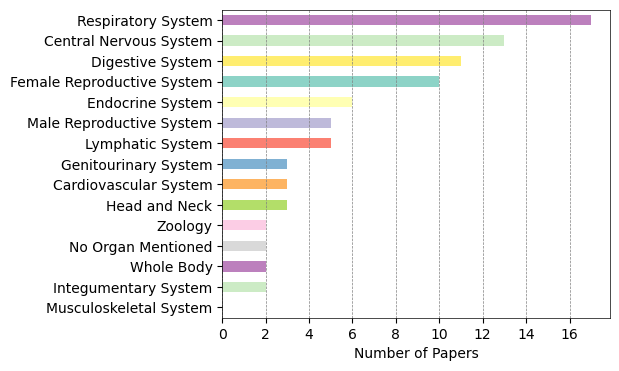

In [10]:
colors = plt.cm.Set3_r.colors  # Or any other colormap that you like


# Summing up each category column to get the total counts for each category
category_counts = df1[list(organ_types_by_category.keys())].sum().sort_values()

# Creating a bar chart
plt.figure(figsize=(5, 4))
category_counts.plot(kind='barh', color=colors)
#plt.title('Frequency of Organ Categories')
plt.xlabel('Number of Papers')
plt.ylabel('Organ Category').set_visible(False)
plt.grid(axis='x', linestyle='--')
#plt.savefig('organ_categories.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()


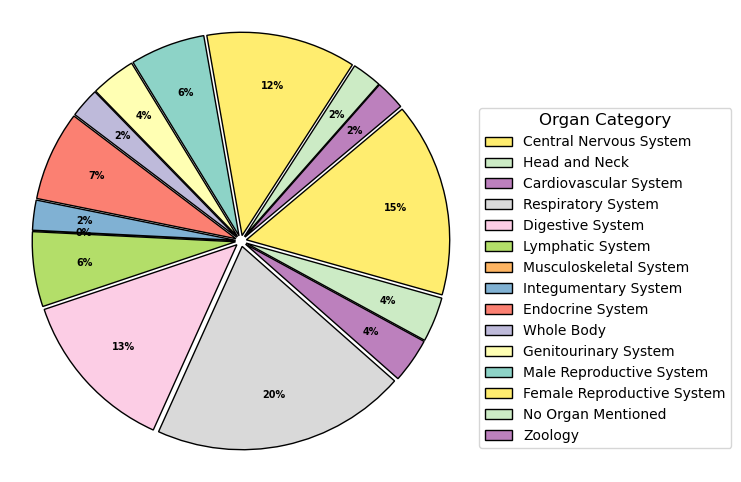

In [11]:
colors = plt.cm.Set3_r.colors  # Or any other colormap that you like

# Total counts for each category as before
category_counts = df1[list(organ_types_by_category.keys())].sum()

# Creating a pie chart
plt.figure(figsize=(7, 6))
category_counts.plot(kind='pie', autopct='%1.0f%%', startangle=40, counterclock=False, shadow=False, colors=colors, 
                     pctdistance=0.75, wedgeprops={'edgecolor': 'black'}, 
                     explode=[0.03]*len(category_counts), radius=1.1, rotatelabels=True, normalize=True, labels=None,
                     ylabel='', legend=True, labeldistance=1., textprops={'fontsize': 7, 'fontweight': 'bold', 'color': 'black', 
                                                                           'rotation_mode': 'anchor', 'rotation': 0, 'verticalalignment': 'center'})

#plt.title('Proportion of Each Organ Category', loc='center', fontsize=15, fontweight='bold').set_visible(True)    

plt.legend(category_counts.index, loc='center left', bbox_to_anchor=(1, 0.42), title='Organ Category', title_fontsize='12', fontsize='10', 
           shadow=False, fancybox=True, ncol=1)
#plt.savefig('organ_category_pie_chart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


#### Broader organ categories
***

2) Broader categories: To decrease the overall number of categories to help making data visualizations like bar charts less cluttered
 
| Broad Category                | Subcategories                        | Specific Organs                                                                            |
|-------------------------------|--------------------------------------|--------------------------------------------------------------------------------------------|
| **Central and Peripheral Nervous System** | Central Nervous System, Head and Neck | Brain, spinal cord, optical chiasm, nerves, eye                                            |
| **Circulatory and Respiratory Systems**   | Cardiovascular System, Respiratory System | Heart, veins, lungs, trachea                                                               |
| **Digestive and Excretory Systems**       | Digestive System, Genitourinary System  | Liver, stomach, intestines, kidney, bladder                                                |
| **Structural and Protective Systems**     | Musculoskeletal System, Integumentary System | Bones, skin, hair, nails                                                                   |
| **Regulatory Systems**                    | Endocrine System, Lymphatic System      | Thyroid, pituitary gland, pancreas, lymph nodes, spleen                                    |
| **Reproductive Systems**                  | Male Reproductive System, Female Reproductive System | Penis, prostate, testes, cervix, uterus, ovaries                                            |
| **Whole Body and Non-Specific**           | Whole Body, No Organ Mentioned          | Overall body studies, papers not mentioning specific organs                                |
| **Zoology**                        | Animal                                  | Organs from non-human studies like swine liver, monkey brain                               |


In [12]:
organ_types_by_category = {
    "Central and Peripheral Nervous System"     : ['brain', 'human brain', 'cerebral', 'brainstem', 'spinal cord', 'cells', 'optical chiasm', 
                                                  'left optical nerve', 'right optical nerve', 'eye', 'brainstem', 'head', 'neck', 'head and neck', 
                                                  'h&n','mandible',  'left parotid', 'right parotid', 'left submandibular gland', 
                                                  'right submandibular gland'],
    "Circulatory and Respiratory Systems"       : ['heart', 'vein', 'chest', 'lung', 'left lung', 'right lung', 'heart', 'thorax', 'esophagus', 
                                                  'trachea'],
    "Digestive and Excretory Systems"            : ['liver', 'stomach', 'gallbladder', 'hepatic', 'hepatic vein', 'large bowel', 'duodenum', 'small bowel', 'abdomen', 
                                                   'colon', 'colon tissue', 'gastro', 'hepatic', 'colorectal', 'genitourinary system', 'pelvic region',
                                                   'pelvis', 'kidney', 'left kidney', 'right kidney', 'bladder', 'renal'],
    "Regulatory Systems"                        : ['lymph nodes', 'lymp nodes', 'spleen', 'thyroid', 'pituitary gland', 'pancreas'],
    "Structural and Protective Systems"         : ['musculoskeletal system', 'skin', 'hair', 'nails'],
    "Whole Body"                                : ['whole body', 'cells', 'tissue'],
    "Male Reproductive System"                  : ['penis', 'prostate', 'testes'],
    "Female Reproductive System"                : ['cervix', 'uterus', 'mammary glands', 'ovaries', 'breast'],
    'No Organ Mentioned'                        : ['no organ mentioned', '0'],
    "Zoology"                                   : ['swine liver', 'monkey brain']
}

# Function to categorize each value and return the set of categories
def categorize_row(row):
    # Split the row by comma and strip spaces
    organ_types = [x.strip() for x in row.split(',')]
    # Initialize a set to hold unique categories for this row
    row_categories = set()
    for organ_type in organ_types:
        # Check each category for a match and add to the set
        for category, types in organ_types_by_category.items():
            if organ_type in types:
                row_categories.add(category)
                break
    # Return a comma-separated string of unique categories or a single category
    return ', '.join(row_categories) if row_categories else 'Uncategorized'

# Apply the categorization function to each row in the DataFrame
df1['organ_category_refined'] = df1['organ/body part in datasets'].apply(categorize_row)

### Organ distribution analysis: Broader Categories
***

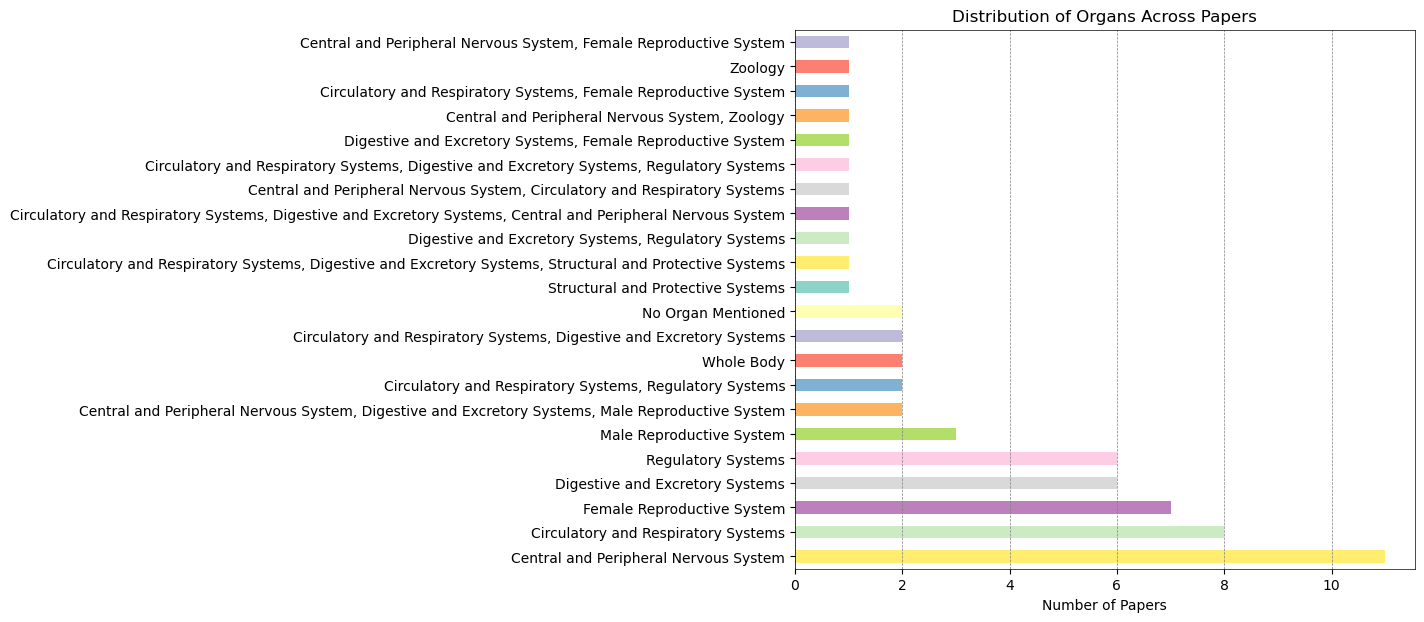

In [13]:
colors = plt.cm.Set3_r.colors  # Or any other colormap that you like


organ_counts = df1['organ_category_refined'].value_counts()
# Horizontal bar chart
plt.figure(figsize=(8, 7))
organ_counts.plot(kind='barh', color=colors)
plt.title('Distribution of Organs Across Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Organ Category').set_visible(False)
plt.grid(axis='x', linestyle='--')
plt.show()

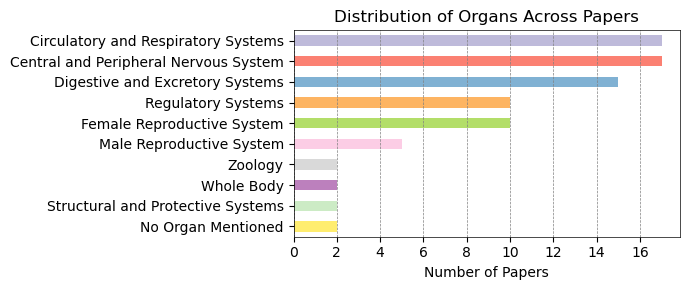

In [14]:
colors = plt.cm.Set3_r.colors  # Or any other colormap that you like


# Create a new dataframe where each row has only one category
# by splitting the 'organ_category_refined' column and then using explode()
df_expanded = df1['organ_category_refined'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
organ_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Horizontal bar chart
plt.figure(figsize=(7, 3))
organ_counts.plot(kind='barh', color=colors)
plt.title('Distribution of Organs Across Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Organ Category').set_visible(False)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()  # This will make sure that labels and titles fit into the figure nicely
plt.savefig('organ_category_refined.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


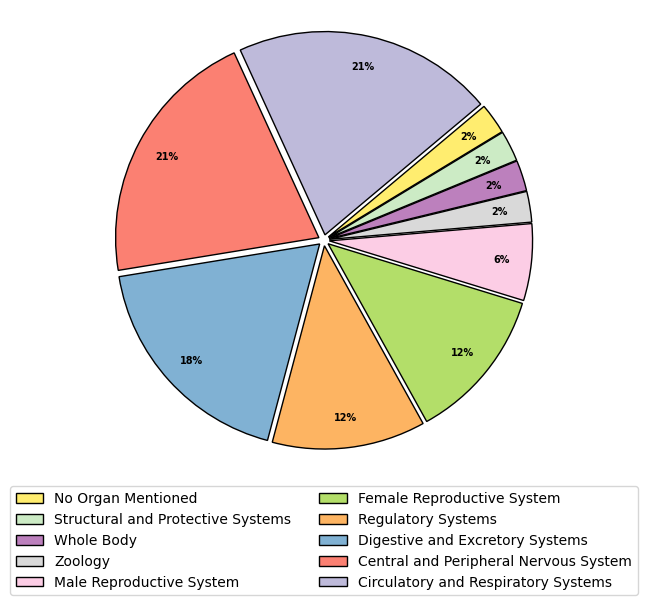

In [15]:
colors = plt.cm.Set3_r.colors  # Or any other colormap that you like

# Creating a pie chart
plt.figure(figsize=(7, 6))
organ_counts.plot(kind='pie', autopct='%1.0f%%', startangle=40, counterclock=False, shadow=False, colors=colors, 
                     pctdistance=0.85, wedgeprops={'edgecolor': 'black'}, 
                     explode=[0.03]*len(organ_counts), radius=1.1, rotatelabels=True, normalize=True, labels=None,
                     ylabel='', legend=True, labeldistance=1., textprops={'fontsize': 7, 'fontweight': 'bold', 'color': 'black', 
                                                                           'rotation_mode': 'anchor', 'rotation': 0, 'verticalalignment': 'center'})
#plt.title('Proportion of Each Organ Category', loc='center', fontsize=15, fontweight='bold').set_visible(True)    

plt.legend(organ_counts.index, loc='center', bbox_to_anchor=(0.5, -0.15), title_fontsize='12', fontsize='10', 
           shadow=False, fancybox=True, ncol=2)
plt.savefig('organ_broader_category_pie_chart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

### Image types
***

The list of image types from the annotations are divided into main categories of the body, based on the imaging technique, purpose, or the type of information they provide

| Category                             | Image Types                                                                                                      |
|--------------------------------------|------------------------------------------------------------------------------------------------------------------|
| **Magnetic Resonance Imaging (MRI)** | mri, t1, t2, flair, dwi, dce-mri, fmri, mr, tractography, mr t1 volumes, mr t2 volumes, magnetic resonance, mr-ct |
| **Computed Tomography (CT)**         | ct, nc-ct, dce-ct, ct volumes, contrast-enhanced abdominal computed tomography images, computed tomography, pet/ct, cbct, ct |
| **Ultrasound**                       | ultrasound, ceus, intra-operative ultrasound, intra-operative us, us, ultrasound volumes, intra-operative ultrasound volumes, ius |
| **Positron Emission Tomography (PET)** | pet, pet/ct                                                                                                      |
| **Endoscopy**                        | gastroscopy, endoscopy, colonoscopy, laparoscopy                                                                |
| **Optical Imaging**                  | fundus, optical coherence tomography, oct, rgb dermatocopy                                                      |
| **X-ray and Radiography**            | xray, x-rays                                                                                                     |
| **Histology and Pathology**          | histopathology, h&e, wsi, wsis, tissue microarrays, biopsy slides, stained image tiles, histology images         |
| **Spectrometry and Specialized Imaging** | intra-operative spectrometry, tomography, multiplex staining, ihc, if                                           |
| **Echocardiography**                 | 2d echocardigrams, echocardiograms                                                                               |
| **Three-dimensional Imaging**        | 3d camera, 3d                                                                                                    |
| **Miscellaneous**                    | segmentation, segmentations, mte, dmri, image titles                                                             |


In [16]:
# Image types: Adding a new column to the new DataFrame with the categorized values 
# Function to categorize values
image_types_by_category = {
    "Magnetic Resonance Imaging (MRI)"      : ["mri", "t1", "t2", "flair", "dwi", "dce-mri", "fmri", "mr", "tractography", 
                                               "mr t1 volumes", "mr t2 volumes", "magnetic resonance", "mr-ct", 'mr t1 volumes'],
    "Computed Tomography (CT)"              : [ "ct", "nc-ct", "dce-ct", 'cts', "ct volumes", "contrast-enhanced abdominal computed tomography images", 
                                               "computed tomography", "pet/ct", "cbct", "ct", 'TMAs', 'tmas', 'tomography'],
    "Ultrasound"                            : ["ultrasound",'us', 'us volumes','ultrasounds', "ceus", "intra-operative ultrasound",'ius', "intra-operative us", "us", 
                                               "ultrasound volumes", "intra-operative ultrasound volumes", "intraoperative ultrasound", "ius"],    
    "Positron Emission Tomography (PET)"    : ["pet", "pet/ct", 'Positron Emission Tomography'],
    "Endoscopy"                             : ["gastroscopy", "endoscopy", "colonoscopy", "laparoscopy", "endoscope"],
    "Optical Imaging"                       : ["fundus", "optical coherence tomography", "oct", "rgb dermatocopy"],
    "X-ray and Radiography"                 : ["xray", "x-rays", "x-ray" ],
    "Histology and Pathology"               : ["histopathology", "h&e", "wsi", "wsis", "tissue microarrays", "biopsy slides", 
                                               "stained image tiles", "histology images"],
    "Spectrometry and Specialized Imaging"  : ["intra-operative spectrometry", "tomography", "multiplex staining", "ihc", "if"],
    "Echocardiography"                      : ["2d echocardigrams", "echocardiograms", '2d'],
    "Three-dimensional Imaging"             : ["3d camera", "3d"],
    "Miscellaneous"                         : ["segmentation", "segmentations", "mte", "dmri", "image titles"]
}

# Function to categorize each value and return the set of categories
def categorize_row(row):
    # Split the row by comma and strip spaces
    image_types = [x.strip() for x in row.split(',')]
    # Initialize a set to hold unique categories for this row
    row_categories = set()
    for image_type in image_types:
        # Check each category for a match and add to the set
        for category, types in image_types_by_category.items():
            if image_type in types:
                row_categories.add(category)
                break
    # Return a comma-separated string of unique categories or a single category
    return ', '.join(row_categories) if row_categories else 'Uncategorized'

# Apply the categorization function to each row in the DataFrame
df1['image_category'] = df1['image type in datasets'].apply(categorize_row)
df1.drop(columns=['organ/body part in datasets', 'image type in datasets'], inplace=True)

### Image type analysis
***

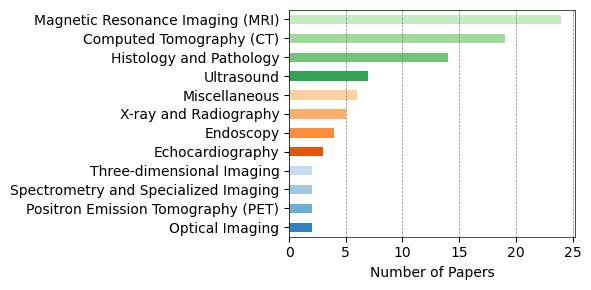

In [17]:
colors = plt.cm.tab20c.colors  # Or any other colormap that you like

# Create a new dataframe where each row has only one category
# by splitting the 'organ_category_refined' column and then using explode()
df_expanded = df1['image_category'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
image_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Horizontal bar chart
plt.figure(figsize=(6, 3))
image_counts.plot(kind='barh', color=colors)
#plt.title('Distribution of Image Types Across Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Image Type Category').set_visible(False)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()  
plt.savefig('image_types.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

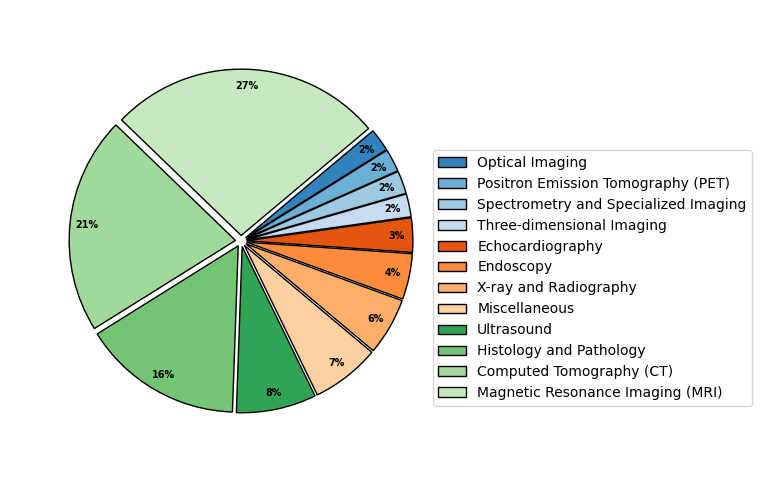

In [18]:
colors = plt.cm.tab20c.colors  # Or any other colormap that you like

# Creating a pie chart
plt.figure(figsize=(7, 6))
image_counts.plot(kind='pie', autopct='%1.0f%%', startangle=40, counterclock=False, shadow=False, colors=colors, 
                     pctdistance=0.90, wedgeprops={'edgecolor': 'black'}, 
                     explode=[0.03]*len(image_counts), radius=0.9, rotatelabels=True, normalize=True, labels=None,
                     ylabel='', legend=True, labeldistance=1.1, textprops={'fontsize': 7, 'fontweight': 'bold', 'color': 'black', 
                                                                           'rotation_mode': 'anchor', 'rotation': 0, 'verticalalignment': 'center'})
#plt.title('Proportion of Each Image Type Category', loc='center', fontsize=15, fontweight='bold').set_visible(True)    

plt.legend(image_counts.index, loc='center left', bbox_to_anchor=(0.9, 0.42), title_fontsize='12', fontsize='10', 
           shadow=False, fancybox=True, ncol=1)
plt.savefig('image_category_pie_chart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


### Demographics
***

This code adds a new column demographics_usage to the dataframe, categorizing each paper based on how extensively it uses demographic information according to a criteria. This approach provides a clear, easy-to-understand categorization based on the presence and count of demographic information in the dataset descriptions.

**Criteria**

To aggregate the counts of demographics across four columns (age, gender, ethnicity, geolocation) into one category (demographics) with levels indicating the extent of demographics usage in papers, I have created 3 different categories:

1. No Demographic Data: For papers that do not use demographic information at all.
2. Limited Use of Demographic Data: For papers that use some demographic information, indicating a moderate level of usage.
3. Extensive Use of Demographic Data: For papers that use a lot of demographic information, indicating a high level of usage.

In [19]:
# Define the aggregation function
def aggregate_demographics(row):
    # Count the number of demographic indicators used (sum of 1s across the 4 columns)
    count = row['age'] + row['sex/gender'] + row['ethnicity'] + row['geographical location ']
    if count == 0:
        return 'No Demographic Data'
    elif 1 <= count <= 2:
        return 'Limited Use of Demographic Data'
    else:
        return 'Extensive Use of Demographic Data'

In [20]:
# Apply the function across each row
df1['demographics_usage'] = df1.apply(aggregate_demographics, axis=1)
df1[['title', 'age', 'sex/gender', 'ethnicity', 'geographical location ', 'demographics_usage']].head() # Preview the updated DataFrame
df1.drop(columns=['age', 'sex/gender', 'ethnicity', 'geographical location '], inplace=True) # Drop the individual columns

### Demographics analysis
***

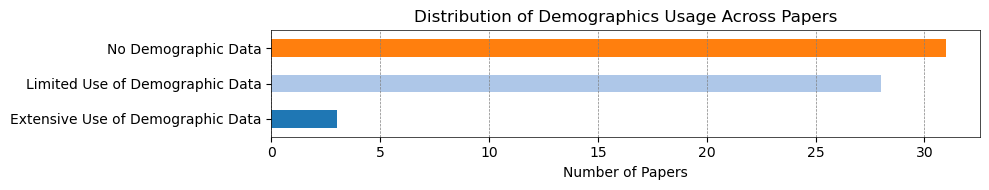

In [21]:
colors = plt.cm.tab20.colors
# Create a new dataframe where each row has only one category
# by splitting the 'organ_category_refined' column and then using explode()
df_expanded = df1['demographics_usage'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
demo_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Horizontal bar chart
plt.figure(figsize=(10, 2))
demo_counts.plot(kind='barh', color=colors)
plt.title('Distribution of Demographics Usage Across Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Demographics Usage').set_visible(False)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()  
plt.savefig('demographics_usage.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

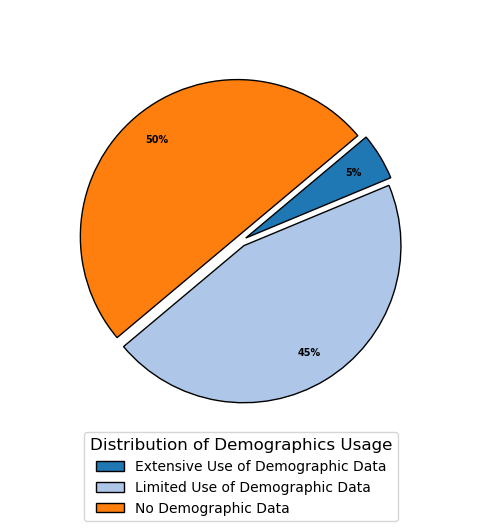

In [22]:
colors = plt.cm.tab20.colors

# Creating a pie chart
plt.figure(figsize=(7, 6))
demo_counts.plot(kind='pie', autopct='%1.0f%%', startangle=40, counterclock=False, shadow=False, colors=colors, 
                     pctdistance=0.80, wedgeprops={'edgecolor': 'black'}, 
                     explode=[0.03]*len(demo_counts), radius=0.85, rotatelabels=True, normalize=True, labels=None,
                     ylabel='', legend=True, labeldistance=1.1, textprops={'fontsize': 7, 'fontweight': 'bold', 'color': 'black', 
                                                                           'rotation_mode': 'anchor', 'rotation': 0, 'verticalalignment': 'center'})
#plt.title('Proportion of Demographics Usage', loc='center', fontsize=15, fontweight='bold').set_visible(True)    

plt.legend(demo_counts.index, loc='center', bbox_to_anchor=(0.5, -0.01), title='Distribution of Demographics Usage', title_fontsize='12', fontsize='10', 
           shadow=False, fancybox=True, ncol=1)
plt.savefig('demographics_usage_pie_chart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


### Datasets
***

1. Full Disclosure: All datasets are accounted for as either public or private.
2. Partial Disclosure: Some datasets are mentioned as public or private, but not all (the total number of datasets exceeds the sum of public and private ones mentioned)
3. No Disclosure: datasets are not mentioned as public or private, or the status of all datasets is undisclosed. 
4. No Mentions of Datasets: The sentence extraction does not provide any information of whether the datasets are private and/or public

In [57]:
def categorize_disclosure(row):
    # Handle the case where no datasets are used
    if row['dataset quantity'] == 0:
        return 'No Mentions of Datasets'
    
    # Convert public and private dataset counts to numeric, setting errors to NaN for non-numeric values
    public_count = pd.to_numeric(row['quantity of public datasets'], errors='coerce')
    private_count = pd.to_numeric(row['quantity of private datasets'], errors='coerce')
    
    # Check if both public and private dataset counts are zero or NaN
    if (public_count == 0 and private_count == 0) and row['dataset quantity'] > 0:
        return 'Dataset Status Undisclosed' 
    
    # Check for full disclosure
    if (public_count != 0 or private_count != 0) and (public_count + private_count == row['dataset quantity']):
        return 'Full Disclosure'
    
    # Check for partial disclosure
    #if (public_count > 0 and private_count == 0) and (public_count + private_count < row['dataset quantity']):        
    if (public_count > 0 and private_count == 0) and row['dataset quantity'] > public_count + private_count:
        return 'Partial Disclosure'
    
    if (public_count == 0 and private_count > 0) and row['dataset quantity'] > public_count + private_count:
        return 'Partial Disclosure'

    # Default case when dataset status is not disclosed properly
    return 'No Information on Dataset Status'

In [59]:
# Apply the function to each row
df1['dataset_disclosure_category'] = df1.apply(categorize_disclosure, axis=1)

# Display the DataFrame with the new disclosure category
df1[['title', 'dataset quantity', 'quantity of public datasets', 'quantity of private datasets', 'dataset_disclosure_category']]
#df1.drop(columns=['quantity of public datasets', 'quantity of private datasets'], inplace=True)
#df1.to_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/cleaned_new_annotations_final.csv', index=False)

### Dataset analysis
***

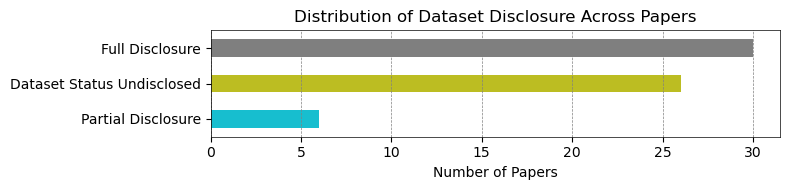

In [64]:
colors = plt.cm.tab10_r.colors

# Create a new dataframe where each row has only one category
# by splitting the 'organ_category_refined' column and then using explode()
df_expanded = df1['dataset_disclosure_category'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
dataset_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Horizontal bar chart
plt.figure(figsize=(8, 2))
dataset_counts.plot(kind='barh', color=colors)
plt.title('Distribution of Dataset Disclosure Across Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Dataset Disclosure').set_visible(False)
plt.grid(axis='x', linestyle='--')
plt.savefig('dataset_disclosure.png', dpi=300, bbox_inches='tight', transparent=True)
plt.tight_layout()  

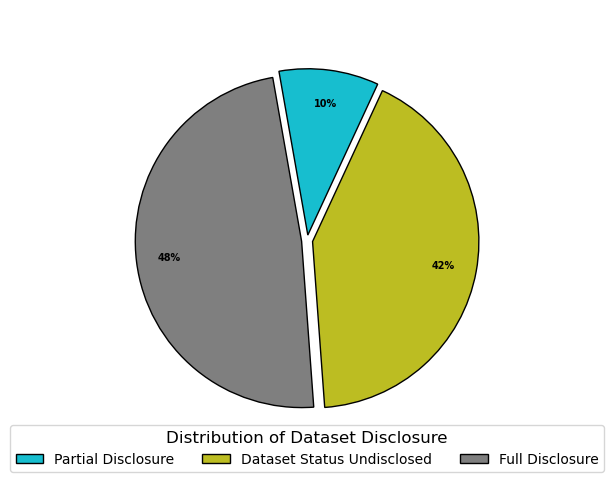

In [65]:
colors = plt.cm.tab10_r.colors

# Creating a pie chart
plt.figure(figsize=(7, 6))
dataset_counts.plot(kind='pie', autopct='%1.0f%%', startangle=100, counterclock=False, shadow=False, colors=colors,
                     pctdistance=0.80, wedgeprops={'edgecolor': 'black'}, 
                     explode=[0.03]*len(dataset_counts), radius=0.9, rotatelabels=True, normalize=True, labels=None,
                     ylabel='', legend=True, labeldistance=1.1, textprops={'fontsize': 7, 'fontweight': 'bold', 'color': 'black', 
                                                                           'rotation_mode': 'anchor', 'rotation': 0, 'verticalalignment': 'center'})
#plt.title('Distribution of Dataset Disclosure', loc='center', fontsize=15, fontweight='bold').set_visible(True)    

plt.legend(dataset_counts.index, loc='center', bbox_to_anchor=(0.5, 0.05), title='Distribution of Dataset Disclosure', title_fontsize='12', fontsize='10', 
           shadow=False, fancybox=True, ncol=3)
plt.savefig('dataset_disclosure_pie_chart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [66]:
def categorize_dataset_status(row):
    if row['dataset quantity'] == 0:
        return 'None'
    elif row['quantity of public datasets'] == row['dataset quantity']:
        return 'All Public'
    elif row['quantity of private datasets'] == row['dataset quantity']:
        return 'All Private'
    elif row['quantity of public datasets'] > 0 and row['quantity of private datasets'] > 0:
        return 'Public and Private'
    elif row['quantity of public datasets'] > 0 and row['quantity of private datasets'] == 0:
        return 'Some Public Some Unknown'
    elif row['quantity of public datasets'] == 0 and row['quantity of private datasets'] > 0:
        return 'Some Private Some Unknown'
    else:
        return 'Unknown'  # This covers cases where dataset quantities do not sum up correctly or are not specified.

# Apply the function to each row
df1['dataset_status'] = df1.apply(categorize_dataset_status, axis=1)

# Now group by the new 'dataset_status' column to get counts
dataset_status_counts = df1['dataset_status'].value_counts()
df1.head()

,title,paper name,vol,Does the article contain any of these keywords: cancer/tumor/tumour?,Study subject labelled as ‘patient/patients’ in dataset(s),dataset quantity,quantity of public datasets,quantity of private datasets,Does the dataset contain sex-specific organ(s)?,Female and/or male organs?,...,Male Reproductive System,Female Reproductive System,No Organ Mentioned,Zoology,organ_category_refined,image_category,demographics_usage,dataset_disclosure_category,dataset_status,location_category
0,3D Arterial Segmentation via Single 2D Project...,14,1,1,1,1,0,1,0,NaN,...,0,0,0,0,Digestive and Excretory Systems,Computed Tomography (CT),Limited Use of Demographic Data,Full Disclosure,All Private,Healthcare facility
1,A Multi-task Network for Anatomy Identificatio...,45,9,1,1,1,0,0,0,NaN,...,0,0,0,0,Regulatory Systems,Endoscopy,Limited Use of Demographic Data,Dataset Status Undisclosed,Unknown,Healthcare facility
2,A Texture Neural Network to Predict the Abnorm...,46,8,1,1,1,0,0,0,NaN,...,0,1,0,0,Female Reproductive System,Magnetic Resonance Imaging (MRI),Extensive Use of Demographic Data,Dataset Status Undisclosed,Unknown,Healthcare facility
3,ALL-IN: A Local GLobal Graph-Based DIstillatio...,74,3,1,1,3,2,0,1,male,...,1,0,0,0,Male Reproductive System,"Histology and Pathology, Magnetic Resonance Im...",No Demographic Data,Partial Disclosure,Some Public Some Unknown,No Location information
4,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,17,1,1,1,1,0,0,0,NaN,...,0,0,0,0,Central and Peripheral Nervous System,Magnetic Resonance Imaging (MRI),No Demographic Data,Dataset Status Undisclosed,Unknown,No Location information


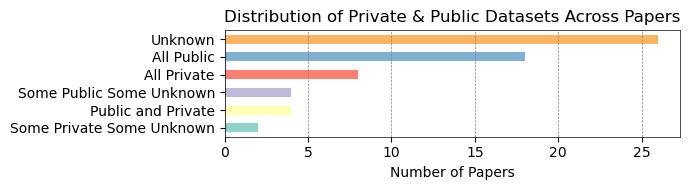

In [67]:
colors = plt.cm.Set3.colors

# Create a new dataframe where each row has only one category
# by splitting the 'organ_category_refined' column and then using explode()
df_expanded = df1['dataset_status'].str.split(', ').explode().reset_index(drop=True)

# Now group by the expanded categories and count occurrences
dataset_status_counts = df_expanded.groupby(df_expanded).count().sort_values()

# Horizontal bar chart
plt.figure(figsize=(7, 2))
dataset_status_counts.plot(kind='barh', color=colors)
plt.title('Distribution of Private & Public Datasets Across Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Datasets').set_visible(False)
plt.grid(axis='x', linestyle='--')
plt.savefig('dataset_status.png', dpi=300, bbox_inches='tight', transparent=True)
plt.tight_layout()  

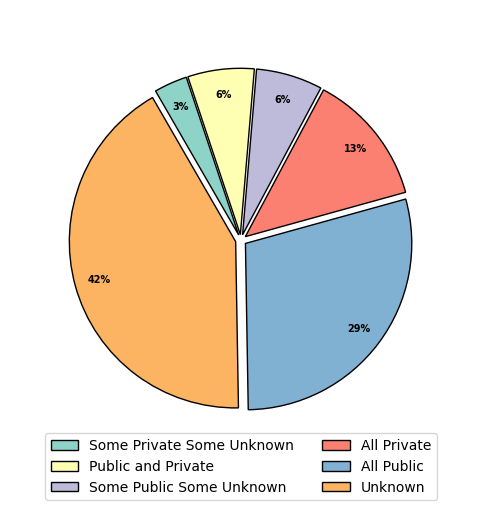

In [68]:
colors = plt.cm.Set3.colors

# Creating a pie chart
plt.figure(figsize=(7, 6))
dataset_status_counts.plot(kind='pie', autopct='%1.0f%%', startangle=120, counterclock=False, shadow=False, colors=colors, 
                     pctdistance=0.85, wedgeprops={'edgecolor': 'black'}, 
                     explode=[0.03]*len(dataset_status_counts), radius=0.9, rotatelabels=True, normalize=True, labels=None,
                     ylabel='', legend=True, labeldistance=1.1, textprops={'fontsize': 7, 'fontweight': 'bold', 'color': 'black', 
                                                                           'rotation_mode': 'anchor', 'rotation': 0, 'verticalalignment': 'center'})
#plt.title('Distribution of Private and Public Datasets', loc='center', fontsize=15, fontweight='bold').set_visible(True)    

plt.legend(dataset_status_counts.index, loc='center', bbox_to_anchor=(0.5, 0.01), title_fontsize='12', fontsize='10', 
           shadow=False, fancybox=True, ncol=2)
plt.savefig('dataset_status_pie_chart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

### Locations Analysis
***

In [30]:
location_cats = [
    'location ',
    'location as a healthcare facility', 'name of healthcare facility',
    'location as other (center/department/laboratory/university/institution/online)',
    'name of location as other (center/department/laboratory/university/institution/online)',
    'location as large-scale geographical entity',
    'name of location as large-scale geographical entity',
    'location as subnational geographical entity',
    'name of location as subnational geographical entity',]
df1[location_cats].head()

,location,location as a healthcare facility,name of healthcare facility,location as other (center/department/laboratory/university/institution/online),name of location as other (center/department/laboratory/university/institution/online),location as large-scale geographical entity,name of location as large-scale geographical entity,location as subnational geographical entity,name of location as subnational geographical entity
0,1,1,No Name,0,No Name,0,No Name,0,No Name
1,1,1,national hospital of neurology and neurosurgery,0,No Name,1,united kingdom,1,london
2,1,1,anonymous,0,No Name,0,No Name,0,No Name
3,0,0,No Name,0,No Name,0,No Name,0,No Name
4,0,0,No Name,0,No Name,0,No Name,0,No Name


In [31]:
# Papers with no location information vs papers with location information
location = (df1['location '] == 0).sum() 
no_location = len(df1) - location 

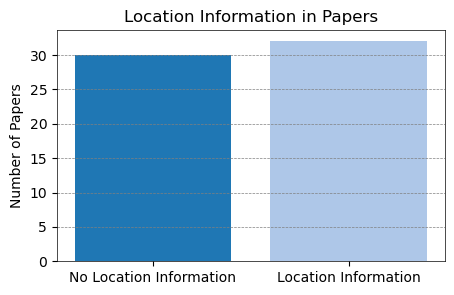

In [32]:
colors = plt.cm.tab20.colors[:5]

plt.figure(figsize=(5, 3))
plt.bar(['No Location Information', 'Location Information'], [no_location, location], color=colors)
plt.title('Location Information in Papers')
plt.ylabel('Number of Papers')
plt.grid(axis='y', linestyle='--')
plt.show()

1. Pie Chart

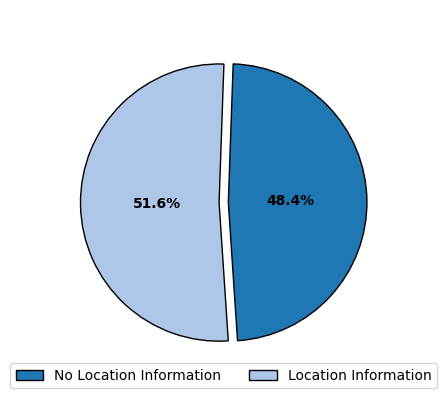

In [33]:
colors = plt.cm.tab20.colors[:5]

# Data
categories = ['No Location Information', 'Location Information']
data = [no_location, location]

# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(data, autopct='%1.1f%%', colors=colors, startangle=88, counterclock=False, shadow=False,
        wedgeprops={'edgecolor': 'black'}, explode=[0.03]*2, radius=0.9, normalize=True, labels=None, pctdistance=0.45, 
        textprops={'fontsize': 10, 'fontweight': 'bold', 'color': 'black', 'rotation_mode': 'anchor', 'rotation': 0, 'verticalalignment': 'center'})
#plt.title('Location Information in Papers')
plt.legend(categories, loc='center', bbox_to_anchor=(0.5, 0.05), title_fontsize='12', fontsize='10', 
           shadow=False, fancybox=True, ncol=2)
plt.savefig('location_pie_chart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


2. Stacked Bar Chart

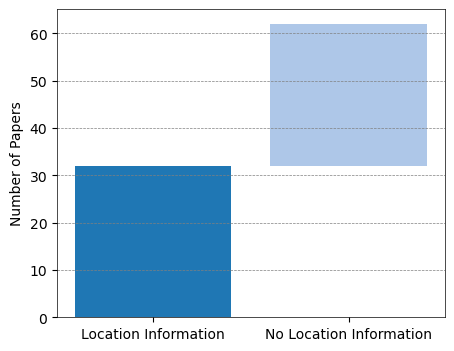

In [34]:
# Data
categories = ['Location Information', 'No Location Information']
data = [location, no_location]

# Create stacked bar chart
plt.figure(figsize=(5, 4))
plt.bar(categories[0], data[0], color=plt.cm.tab20.colors[0])
plt.bar(categories[1], data[1], bottom=data[0], color=plt.cm.tab20.colors[1])
#plt.title('Location Information in Papers')
plt.ylabel('Number of Papers')
plt.grid(axis='y', linestyle='--')
#plt.legend(categories, loc='lower left', bbox_to_anchor=(0.5, 0.05), title='Location Types', title_fontsize='12', fontsize='10')
plt.savefig('location_stacked_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

3. Horizontal Bar Chart

#### Broader organ categories
***

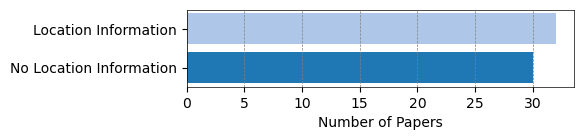

In [35]:
colors = plt.cm.tab20.colors[:5]

# Data
categories = ['No Location Information', 'Location Information']
data = [no_location, location]

# Create horizontal bar chart
plt.figure(figsize=(5, 1))
plt.barh(categories, data, color=colors)
plt.xlabel('Number of Papers')
#plt.title('Location Information in MICCAI 2023 Articles')
plt.grid(axis='x', linestyle='--')
plt.savefig('location_horizontal_bar_chart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

4. Donut Chart

/var/folders/bn/qvp15lc54w559qnxjpvy0bzw0000gn/T/ipykernel_9124/4288253565.py:1: DeprecationWarning: 'cgitb' is deprecated and slated for removal in Python 3.13
  from cgitb import text


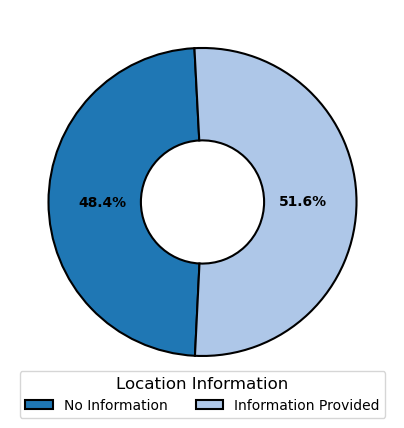

In [36]:
from cgitb import text
from turtle import title

colors = plt.cm.tab20.colors[:5]

# Create donut chart
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))
categories = ['No Information', 'Information Provided']

# Data
data = [no_location, location]
wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%', colors=colors, startangle=93, wedgeprops=dict(width=0.6, edgecolor='black', linewidth=1.5), pctdistance=0.65, 
                                  textprops=dict(fontsize=10, fontweight='bold', color='black', rotation_mode='anchor', rotation=0, verticalalignment='center'))
plt.legend(categories, loc='center', bbox_to_anchor=(0.5, 0.0), title='Location Information', title_fontsize='12', fontsize='10', shadow=False, fancybox=True, ncol=2)

#plt.title('Location Information in MICCAI 2023 Articles')
plt.savefig('location_donut_chart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

5. Percentage Bar Chart

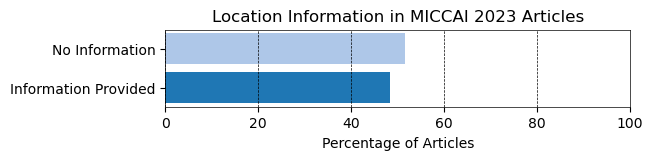

In [37]:
colors = plt.cm.tab20.colors[:3]

# Calculate percentages
total = no_location + location
percentages = [no_location / total * 100, location / total * 100]

categories = ['Information Provided', 'No Information']

# Create percentage bar chart
fig, ax = plt.subplots(figsize=(6, 1))
ax.barh(categories, percentages, color=colors)
ax.set_xlim(0, 100)  # Since it's percentages, we limit the x-axis to 100
ax.set_xlabel('Percentage of Articles')
plt.title('Location Information in MICCAI 2023 Articles')
plt.grid(axis='x', linestyle='--', color='black')
plt.savefig('location_percentage_bar_chart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

### Location Analysis: Distribution of the different location types
***

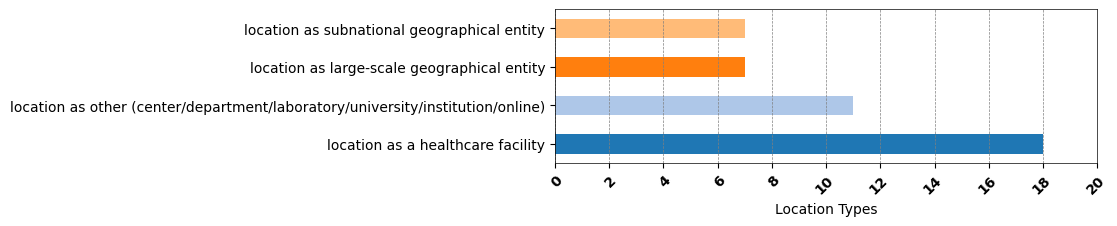

In [38]:
from matplotlib.ticker import MaxNLocator

colors = plt.cm.tab20.colors  # Or any other colormap that you like

# Sum each type of location
location_sums = df1[['location as a healthcare facility', 
                    'location as other (center/department/laboratory/university/institution/online)', 
                    'location as large-scale geographical entity', 
                    'location as subnational geographical entity']].sum()

# Plotting the stacked bar chart
location_sums.plot(kind='barh', stacked=True, figsize=(7, 2), color=colors)

ax = plt.gca()  # Get the current axis

# Set major locator for x-axis to use integer values instead of floats
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('Location Types')
plt.ylabel('Count').set_visible(False)
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold', rotation_mode='anchor')
plt.xlim(0, 20)
plt.grid(axis='x', linestyle='--')
#plt.savefig('location_types_chart.png', dpi=300, bbox_inches='tight')
plt.show()

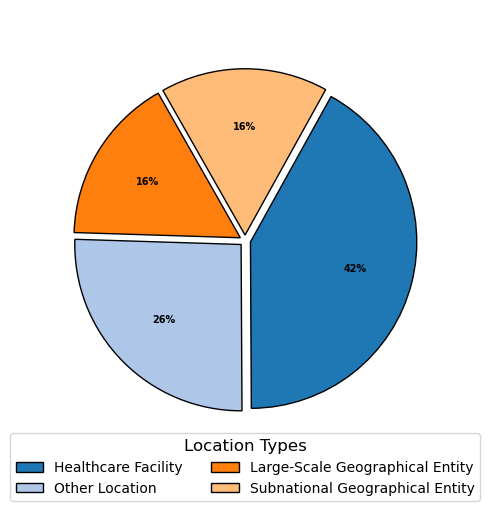

In [39]:
colors = plt.cm.tab20.colors  # Or any other colormap that you like


# Creating a pie chart
plt.figure(figsize=(7, 6))
location_sums.plot(kind='pie', autopct='%1.0f%%', startangle=61, counterclock=False, shadow=False, colors=colors, 
                     pctdistance=0.65, wedgeprops={'edgecolor': 'black'}, 
                     explode=[0.03]*len(location_sums), radius=0.9, rotatelabels=True, normalize=True, labels=None,
                     ylabel='', legend=True, labeldistance=1.1, textprops={'fontsize': 7, 'fontweight': 'bold', 'color': 'black', 
                                                                           'rotation_mode': 'anchor', 'rotation': 0, 'verticalalignment': 'center'})
#plt.title('Proportion of Location Types', loc='center', fontsize=15, fontweight='bold').set_visible(True)    

legend_labels = ['Healthcare Facility', 'Other Location', 'Large-Scale Geographical Entity', 'Subnational Geographical Entity']

plt.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 0.01), title='Location Types', title_fontsize='12', fontsize='10', 
           shadow=False, fancybox=True, ncol=2)
plt.savefig('location_types_pie_chart.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

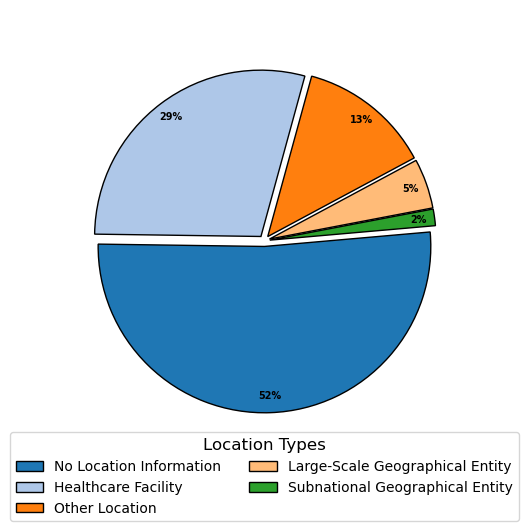

In [40]:
# I want a pie chart that shows the proportion of each category in the 'location ' column with the following categories:
# - No location information
# - Location as a healthcare facility
# - Location as other (center/department/laboratory/university/institution/online)
# - Location as large-scale geographical entity
# - Location as subnational geographical entity

colors = plt.cm.tab20.colors  # Or any other colormap that you like

# First, we will create a new column 'location_category' to categorize each row
def categorize_location(row):
    if row['location '] == 0:
        return 'No Location information'
    elif row['location as a healthcare facility'] == 1:
        return 'Healthcare facility'
    elif row['location as other (center/department/laboratory/university/institution/online)'] == 1:
        return 'Other'
    elif row['location as large-scale geographical entity'] == 1:
        return 'Large-scale geographical entity'
    else:
        return 'Subnational geographical entity'

# Apply the function to create the 'location_category' column
df1['location_category'] = df1.apply(categorize_location, axis=1)

# Count the frequency of each category
location_category_counts = df1['location_category'].value_counts()

# Creating a pie chart
plt.figure(figsize=(7, 6))
location_category_counts.plot(kind='pie', autopct='%1.0f%%', startangle=5, counterclock=False, shadow=False, colors=colors, 
                     pctdistance=0.90, wedgeprops={'edgecolor': 'black'}, 
                     explode=[0.03]*len(location_category_counts), radius=0.9, rotatelabels=True, normalize=True, labels=None,
                     ylabel='', legend=True, labeldistance=1.1, textprops={'fontsize': 7, 'fontweight': 'bold', 'color': 'black', 
                                                                           'rotation_mode': 'anchor', 'rotation': 0, 'verticalalignment': 'center'})
#plt.title('Proportion of Location Types', loc='center', fontsize=15, fontweight='bold').set_visible(True)    

legend_labels = ['No Location Information', 'Healthcare Facility', 'Other Location', 'Large-Scale Geographical Entity', 'Subnational Geographical Entity']

plt.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, -0.01), title='Location Types', title_fontsize='12', fontsize='10', 
           shadow=False, fancybox=True, ncol=2)
plt.savefig('location_category_pie_chart_with_no_locations.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


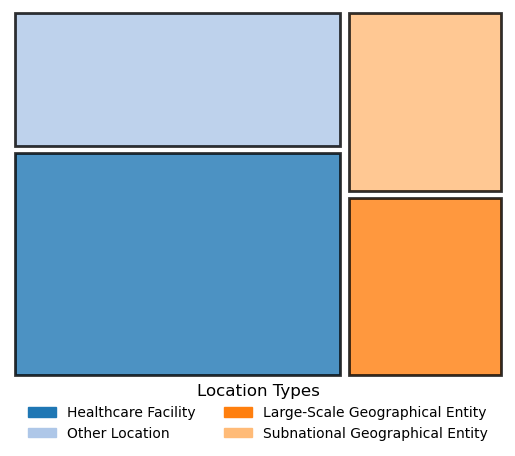

In [41]:
import squarify
import matplotlib.patches as mpatches

# Only for locations == 1
sizes = df1[['location as a healthcare facility', 
             'location as other (center/department/laboratory/university/institution/online)', 
             'location as large-scale geographical entity', 
             'location as subnational geographical entity']].sum()

colors = plt.cm.tab20.colors  # Or any other colormap that you like

# Creating a treemap without the labels
squarify.plot(sizes=sizes, alpha=0.8, color=colors, pad=True, bar_kwargs={'edgecolor': 'black', 'linewidth': 2})

# Creating legend patches
legend_labels = ['Healthcare Facility', 'Other Location', 'Large-Scale Geographical Entity', 'Subnational Geographical Entity']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors[:len(sizes)], legend_labels)]

# Creating the legend with the custom patches
plt.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, -0.2), title='Location Types', title_fontsize='12', fontsize='10',
 shadow=False, fancybox=True, ncol=2, frameon=False)

plt.axis('off')  # Remove the axes
#plt.title('Treemap of Location Types')
plt.savefig('location_treemap.png', dpi=300, bbox_inches='tight')
plt.show()

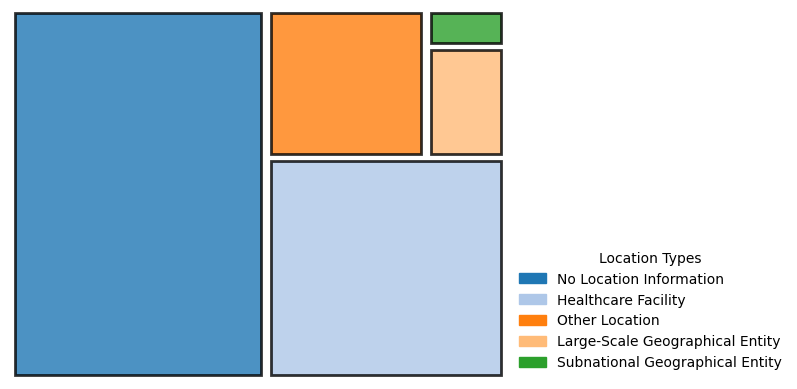

In [42]:
colors = plt.cm.tab20.colors  # Or any other colormap that you like

# Creating a treemap without the labels
squarify.plot(sizes=location_category_counts, alpha=0.8, color=colors, pad=True, bar_kwargs={'edgecolor': 'black', 'linewidth': 2})

# Creating legend patches
legend_labels = ['No Location Information', 'Healthcare Facility', 'Other Location', 'Large-Scale Geographical Entity', 'Subnational Geographical Entity']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors[:len(location_category_counts)], legend_labels)]

# Creating the legend with the custom patches
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 0.38), title='Location Types', fontsize='10',
           shadow=False, fancybox=True, ncol=1, frameon=False)

plt.axis('off')  # Remove the axes
#plt.title('Treemap of Location Types')
plt.savefig('location_category_treemap.png', dpi=300, bbox_inches='tight')
plt.show()

### Location Analysis: Name of locations
***

This section explores into deeper details of location such as name of healthcare facilities mentioned by papers, name of geographical locations and if papers define location to be other than healthcare facilities and/or geographical locations

1) How many papers provide location details?
2) What are these location details? 
3) Do they make sense - would the reader know where the data is collected from by that information provided from the paper?

#### 1. Healthcare facility
***

In [43]:
# Color palettes
# ['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 
# 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r','Accent_r', 'Dark2_r', 'Paired_r', 'Pastel1_r', 'Pastel2_r', 'Set1_r', 'Set2_r', 
# 'Set3_r', 'tab10_r', 'tab20_r', 'tab20b_r', 'tab20c_r']

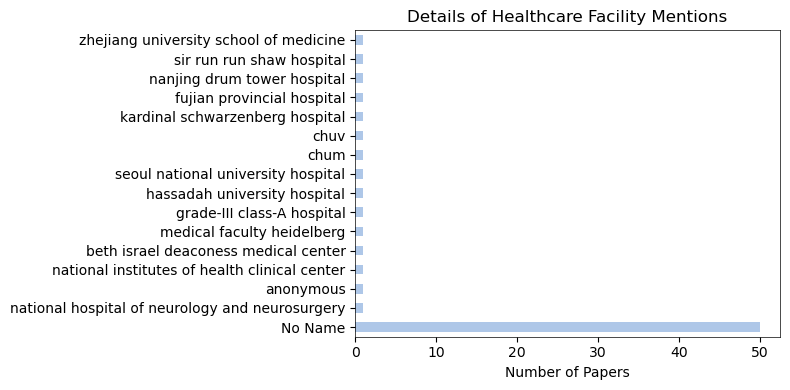

In [44]:
colors = plt.cm.tab20.colors[1]  # Or any other colormap that you like

# Splitting the 'name of healthcare facility' 

# Split the 'name of healthcare facility' by a delimiter (e.g., comma) if multiple values are present in a single cell
# and then explode the dataframe to have a single value per row.
df1['name of healthcare facility'] = df1['name of healthcare facility'].str.split(', ')  # Split by comma
df1_exploded = df1.explode('name of healthcare facility') # Explode the DataFrame

# Count the occurrences of each healthcare facility
facility_counts = df1_exploded['name of healthcare facility'].value_counts()
plt.figure(figsize=(8, 4))
ax = facility_counts.plot(kind='barh', color=colors)
plt.title('Details of Healthcare Facility Mentions')
plt.xlabel('Number of Papers')
plt.tight_layout()
plt.show() # The readibility of the plot can be improved by splitting the names of the facilities into multiple lines

In [45]:
# Improve the readability of the plot by limiting the number of facilities shown

# Categorise the values into 
# - 'No Name' for missing values
# - 'Name Provided' for non-missing values
# - 'Anonymous' for 'anonymous' values
# - 'Abbreviation' for values that are likely abbreviations

def categorize_facility_names(name):
    if name == 'No Name' or name == np.nan or pd.isnull(name) or name == '0':
        return 'No Name'
    elif name == 'anonymous':
        return 'Anonymous'
    elif len(name) < 5:
        return 'Abbreviation'
    else:
        return 'Name Provided'

# Apply the function to create a new column
df1_exploded['facility_name_category'] = df1_exploded['name of healthcare facility'].apply(categorize_facility_names)

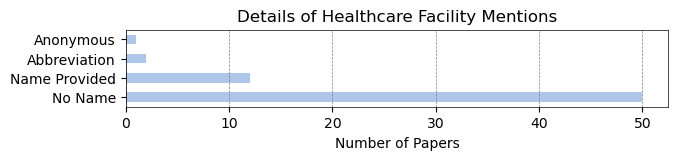

In [46]:
colors = plt.cm.tab20.colors[1]  # Or any other colormap that you like

# Plotting the refined bar chart
facility_counts_refined = df1_exploded['facility_name_category'].value_counts()
plt.figure(figsize=(7, 1))
ax = facility_counts_refined.plot(kind='barh', color=colors)
plt.title('Details of Healthcare Facility Mentions')
plt.xlabel('Number of Papers')
plt.grid(axis='x', linestyle='--')
plt.savefig('facility_mentions.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

#### 2. Locations as Other
***

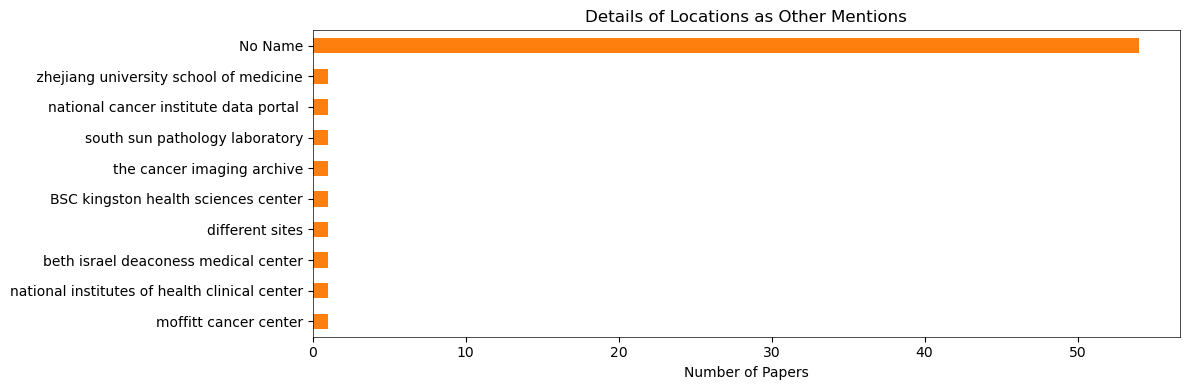

In [47]:
# Splitting the column values and exploding the DataFrame

# Split the 'name of healthcare facility' by a delimiter (e.g., comma) if multiple values are present in a single cell
# and then explode the dataframe to have a single value per row.
df1['name of location as other (center/department/laboratory/university/institution/online)'] = df1['name of location as other (center/department/laboratory/university/institution/online)'].str.split(', ')  # Split by comma
df1_exploded = df1.explode('name of location as other (center/department/laboratory/university/institution/online)') # Explode the DataFrame

colors = plt.cm.tab20.colors[2]  # Or any other colormap that you like

# Count the occurrences 
loc_as_other = df1_exploded['name of location as other (center/department/laboratory/university/institution/online)'].value_counts()
plt.figure(figsize=(12, 4))
ax = loc_as_other.sort_values().plot(kind='barh', color=colors)
plt.title('Details of Locations as Other Mentions')
plt.xlabel('Number of Papers')
plt.tight_layout()
plt.show()

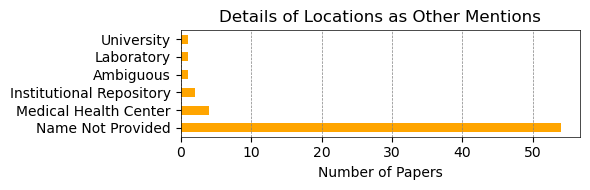

In [48]:
# Improve the readability of the plot by limiting the number of categories shown

# Categorise the values into 
# - 'Name Not Provided' for missing values
# - 'Health Center' for values that contain 'Health Center'
# - 'University' for values that contain 'university'
# - 'Laboratory' for values that contain 'Laboratory'
# - 'Archive' for values that contain 'Archive' or 'Data Portal'
# - 'Ambiguous' for values that that are ambiguous or unclear


# Define a function to categorize each location name
def categorize_location(name):
    if pd.isna(name) or name == 'No Name':
        return 'Name Not Provided'
    elif 'center' in name.lower():
        return 'Medical Health Center'
    elif 'university' in name.lower() or 'science' in name.lower():
        return 'University'
    elif 'laboratory' in name.lower():
        return 'Laboratory'
    elif 'archive' in name.lower() or 'data portal' in name.lower():
        return 'Institutional Repository'
    else:
        return 'Ambiguous'

# Apply the function to the 'location_name' column to create a new 'category' column
df1_exploded['location_as_other_category'] = df1_exploded['name of location as other (center/department/laboratory/university/institution/online)'].apply(categorize_location)

# Now group by the new 'category' column and count occurrences
category_counts = df1_exploded['location_as_other_category'].value_counts()

# Plotting the horizontal bar chart with the categorized values
plt.figure(figsize=(6, 2))  # Adjust figure size as needed
category_counts.plot(kind='barh', color='orange')  # Choose a color that fits your plot
plt.title('Details of Locations as Other Mentions')
plt.xlabel('Number of Papers')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()

# Save the plot if needed
plt.savefig('categorized_locations.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


#### 3. Location as Geographical location
***

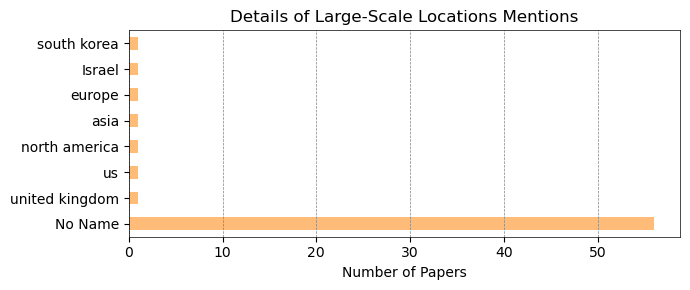

In [49]:
#colors = plt.cm.tab20_r.colors[:5]
colors = plt.cm.tab20.colors[3]  # Or any other colormap that you like

# Split the 'name of healthcare facility' by a delimiter (e.g., comma) if multiple values are present in a single cell
# and then explode the dataframe to have a single value per row.
df1['name of location as large-scale geographical entity'] = df1['name of location as large-scale geographical entity'].str.split(', ')  # Split by comma
df1_exploded = df1.explode('name of location as large-scale geographical entity') # Explode the DataFrame


# Count the occurrences 
large_geo_loc_counts = df1_exploded['name of location as large-scale geographical entity'].value_counts()
plt.figure(figsize=(7, 3))
ax = large_geo_loc_counts.plot(kind='barh', color=colors)
plt.title('Details of Large-Scale Locations Mentions')
plt.xlabel('Number of Papers')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


In [50]:
# Define a function to categorize each location name
def categorize_large_geolocation(name):
    if pd.isna(name) or name == 'No Name':
        return 'Name Not Provided'
    elif 'us' in name.lower() or 'north america' in name.lower():
        return 'North America'
    elif 'asia' in name.lower() or 'south korea' in name.lower() or 'Israel' in name.lower():
        return 'Asia'
    else:
        return 'Europe'

df1_exploded['location_as_continent'] = df1_exploded['name of location as large-scale geographical entity'].apply(categorize_large_geolocation)

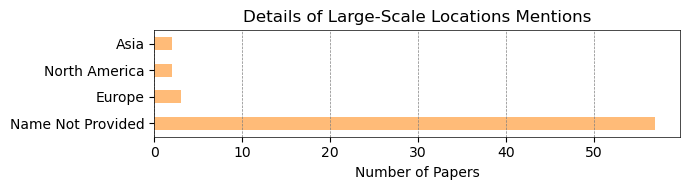

In [51]:
# Count the occurrences 
large_geo_loc_counts = df1_exploded['location_as_continent'].value_counts()
plt.figure(figsize=(7, 2))
ax = large_geo_loc_counts.plot(kind='barh', color=colors)
plt.title('Details of Large-Scale Locations Mentions')
plt.xlabel('Number of Papers')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.savefig('large_scale_geolocation.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [52]:
colors = plt.cm.tab20.colors[4]  # Or any other colormap that you like

# Split the 'name of healthcare facility' by a delimiter (e.g., comma) if multiple values are present in a single cell
# and then explode the dataframe to have a single value per row.
df1['name of location as subnational geographical entity'] = df1['name of location as subnational geographical entity'].str.split(', ')  # Split by comma
df1_exploded = df1.explode('name of location as subnational geographical entity') # Explode the DataFrame

# Define a function to categorize each location name
def categorize_large_geolocation(name):
    if pd.isna(name) or name == 'No Name':
        return 'Name Not Provided'
    elif 'boston' in name.lower():
        return 'USA'
    elif 'seoul' in name.lower():
        return 'South Korea'
    elif 'jerusalem' in name.lower():
        return 'Israel'
    elif 'london' in name.lower():
        return 'UK'
    elif 'salzburg' in name.lower():
        return 'Austria'
    elif 'helskini' in name.lower():
        return 'Finland'
    else:
        return 'Ambiguous'

df1_exploded['location_as_country'] = df1_exploded['name of location as subnational geographical entity'].apply(categorize_large_geolocation)


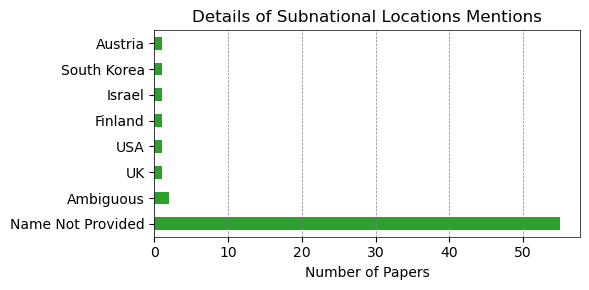

In [53]:
# Count the occurrences 
subnational_geo_loc_counts = df1_exploded['location_as_country'].value_counts()
plt.figure(figsize=(6, 3))
ax = subnational_geo_loc_counts.plot(kind='barh', color=colors)
plt.title('Details of Subnational Locations Mentions')
plt.xlabel('Number of Papers')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.savefig('subnational_locations.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

### Sex-specific organs in datasets
***

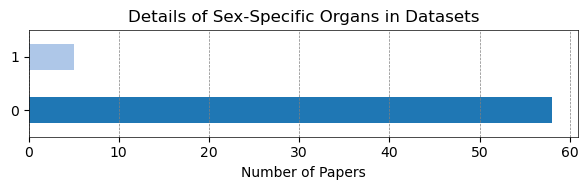

In [54]:
sex_specific_organ_counts = df1_exploded['Does the dataset contain sex-specific organ(s)?'].value_counts()
plt.figure(figsize=(6, 2))
ax = sex_specific_organ_counts.plot(kind='barh', color=plt.cm.tab20.colors)
plt.title('Details of Sex-Specific Organs in Datasets')
plt.xlabel('Number of Papers')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

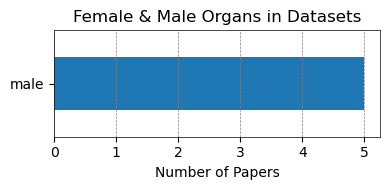

In [55]:
sex_specific_organs = df1_exploded['Female and/or male organs?'].value_counts()
plt.figure(figsize=(4, 2))
ax = sex_specific_organs.plot(kind='barh', color=plt.cm.tab20.colors)
plt.title('Female & Male Organs in Datasets')
plt.xlabel('Number of Papers')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

### Relevant information to be find outside paper's content
***

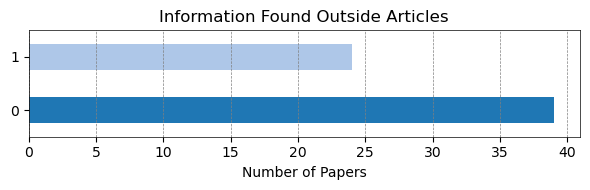

In [56]:
info_outside_paper = df1_exploded['Information found outside article (such as sup material and/or by references'].value_counts()
plt.figure(figsize=(6, 2))
ax = info_outside_paper.plot(kind='barh', color=plt.cm.tab20.colors)
plt.title('Information Found Outside Articles')
plt.xlabel('Number of Papers')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()